<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import scipy

# pandas display settings
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.set_option('precision', 2)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# ipython display
from IPython.display import Image

# data dirs
snap_dir = '../data/snapshots/'
data_dir = '../data/excel/'

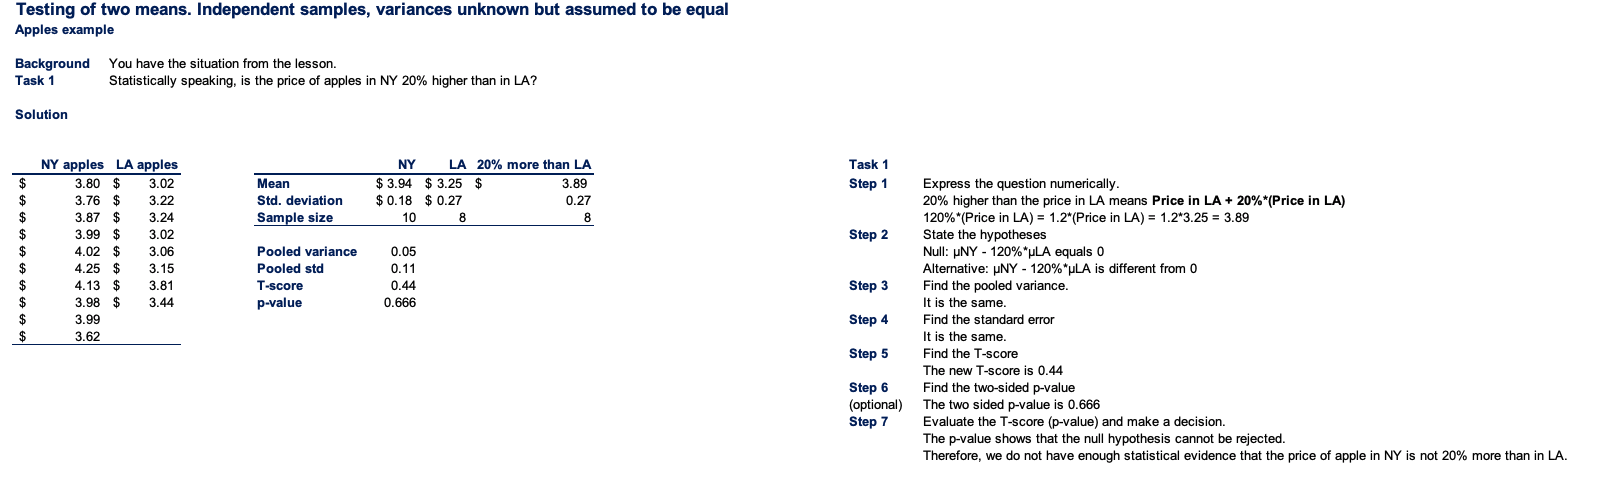

In [2]:
Image(filename=(snap_dir + 'sol_4.9.png'),width=1000)

In [3]:
# data
ny = np.array([3.8, 3.76, 3.87, 3.99, 4.02, 4.25, 4.13, 3.98, 3.99, 3.62])
la = np.array([3.02, 3.22, 3.24, 3.02, 3.06, 3.15, 3.81, 3.44])

xbar, ybar = ny.mean(), la.mean()
xbar, ybar

(3.941, 3.245)

In [4]:
# the mean of LA is assumed to be 120% of values
ybar *= 120/100
ybar

3.894

In [5]:
sx,sy = ny.std(), la.std()
sx,sy

(0.17449641830135082, 0.25059928172283336)

In [6]:
nx,ny = ny.size, la.size
nx,ny

(10, 8)

In [7]:
# Question: is NY price 20% higher than LA ?

In [8]:
# H0:  mu(NY) = 120% of mu(LA)  two-sided test

In [9]:
# for small sample use t-test.
# variances are not known, but assumed equal.

In [10]:
# pooled variance
sp2 =  ((nx-1) * sx**2 + (ny-1) * sy**2 ) / (nx +ny -2)
sp2

0.0446025625

In [11]:
std_err = np.sqrt(sp2/nx + sp2/ny)
std_err

0.10017772488183188

In [12]:
# T-score
T = (xbar - ybar) / std_err
T

0.4691661749699366

In [13]:
# p-value
nsided = 2
dof = nx + ny -2
p_value = scipy.stats.t.sf(np.abs(T), dof) * nsided
round(p_value,2)


0.65

In [14]:
# p_value < significance

p_value < 0.05 # 5% significance

False

In [15]:
# we reject H0 if p-value < significance and say the test is not true.

# Therefore, we do not have enough statistical evidence that 
# the price of apple in NY is not 20% more than in LA.